<a href="https://colab.research.google.com/github/bab-geek/Disease-Predictor/blob/main/Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Environment setup complete!
✅ Heart Disease dataset loaded successfully!
Shape: (303, 14)

EXPLORING HEART DISEASE
📊 Dataset Shape: (303, 14)
📈 Features: 13, Samples: 303

⚠️  Missing Values:
ca      4
thal    2
dtype: int64

📋 Data Types:
float64    13
int64       1
Name: count, dtype: int64

🎯 Target Distribution:
target
0    164
1    139
Name: count, dtype: int64
Class Balance: 0.85

📈 Statistical Summary:
              age         sex          cp    trestbps        chol         fbs     restecg     thalach       exang     oldpeak       slope          ca        thal      target
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000  301.000000  303.000000
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515    0.990099  149.607261    0.326733    1.039604    1.600660    0.672241    4.734219    0.458746
std      9.038662    0.467299    0.960126   17.599748   51.7769

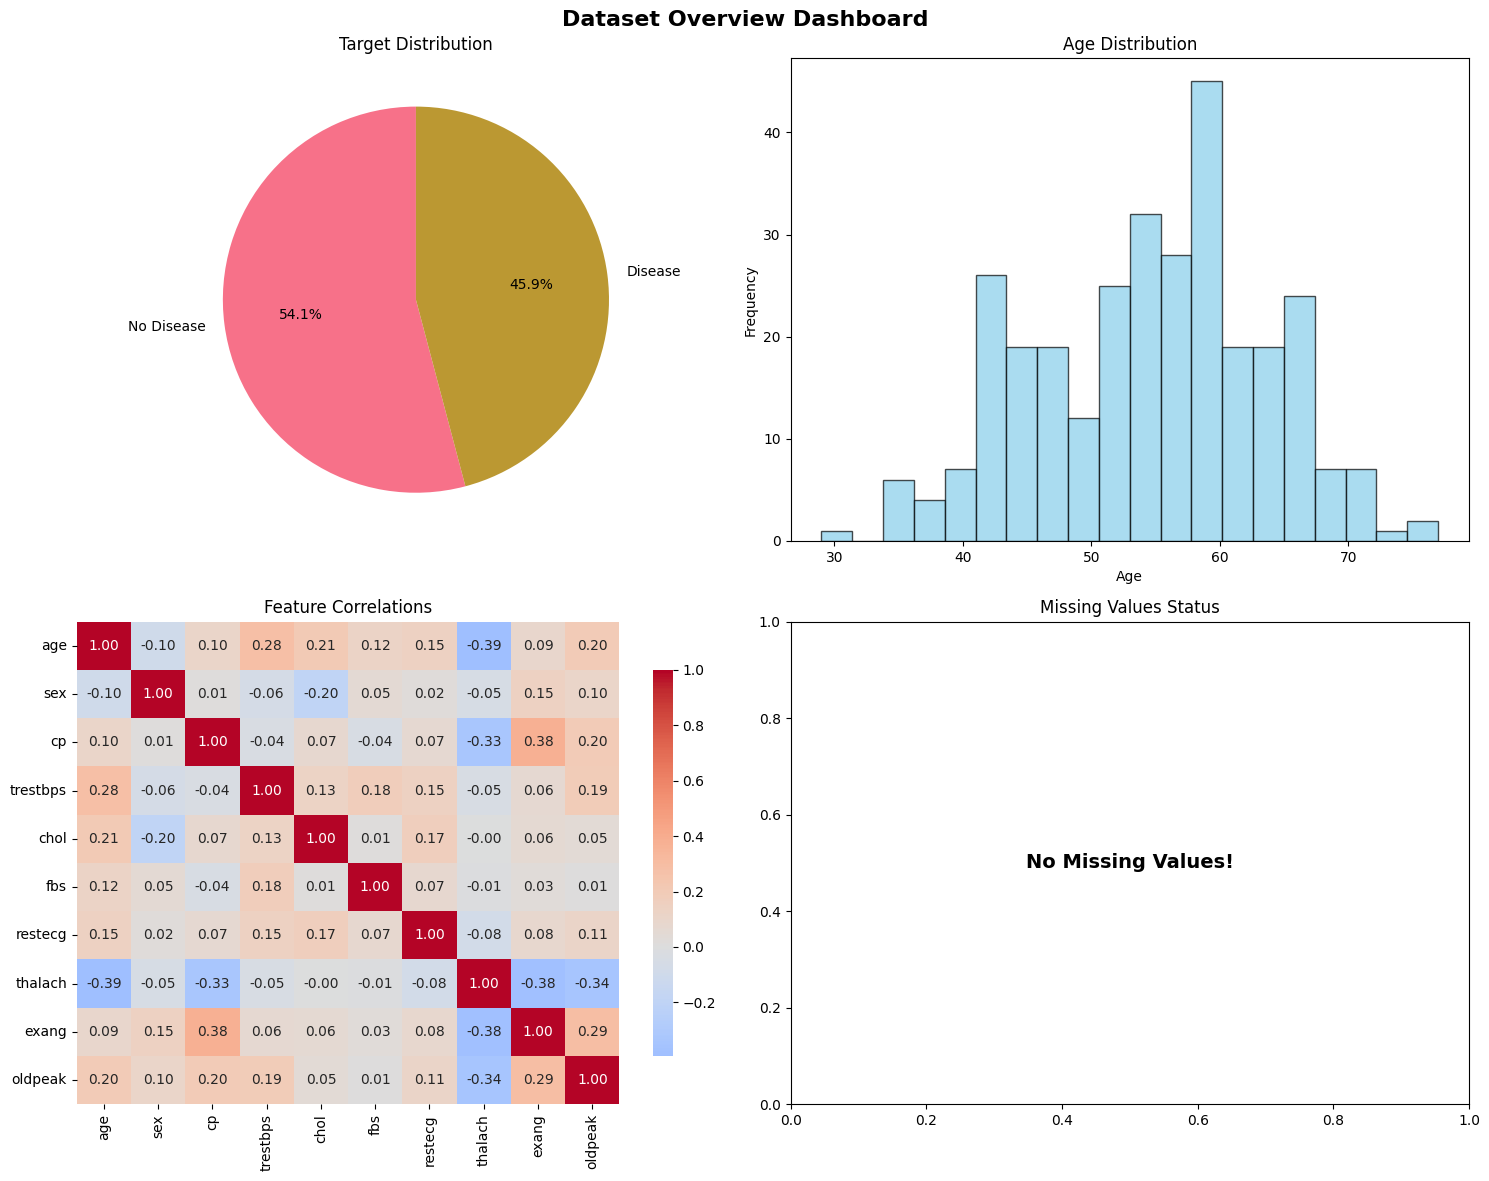


🔧 Preparing Data for Training...
✅ Data prepared!
Training set: 242 samples
Test set: 61 samples
✅ Models initialized with optimal hyperparameters!

🚀 Training and Evaluating Models...

🔧 Scaling Features...
✅ Features scaled successfully!

📈 Training Logistic Regression...
✅ Logistic Regression completed!
   Accuracy: 0.869
   ROC-AUC: 0.950
   CV Score: 0.830 (+/- 0.097)

📈 Training Decision Tree...
✅ Decision Tree completed!
   Accuracy: 0.869
   ROC-AUC: 0.878
   CV Score: 0.747 (+/- 0.162)


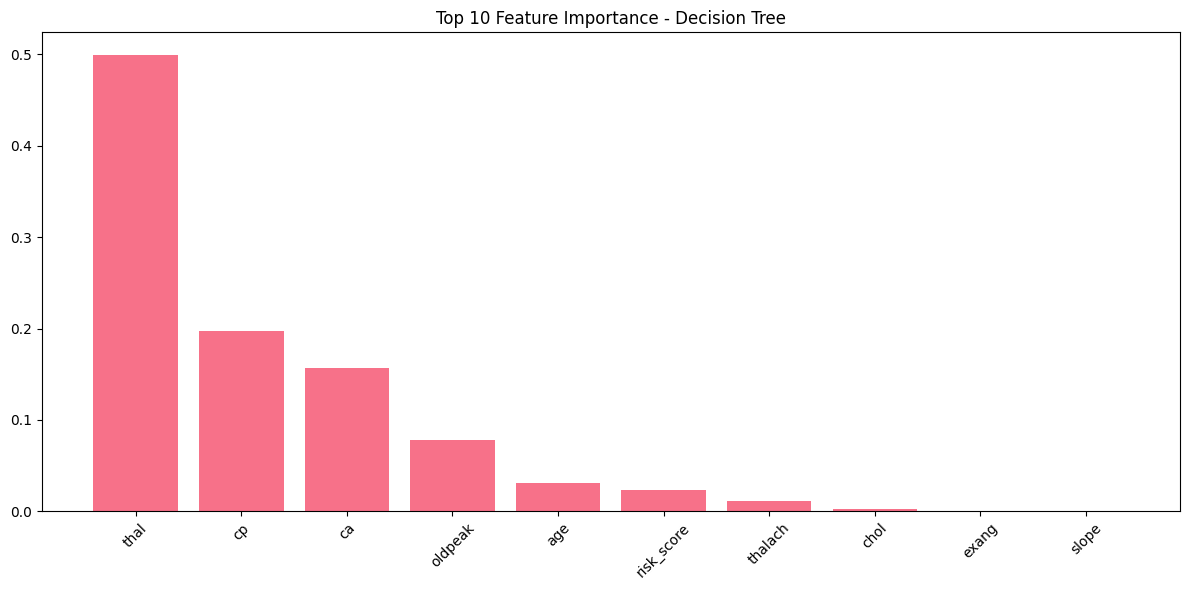


📈 Training Random Forest...
✅ Random Forest completed!
   Accuracy: 0.902
   ROC-AUC: 0.959
   CV Score: 0.822 (+/- 0.119)


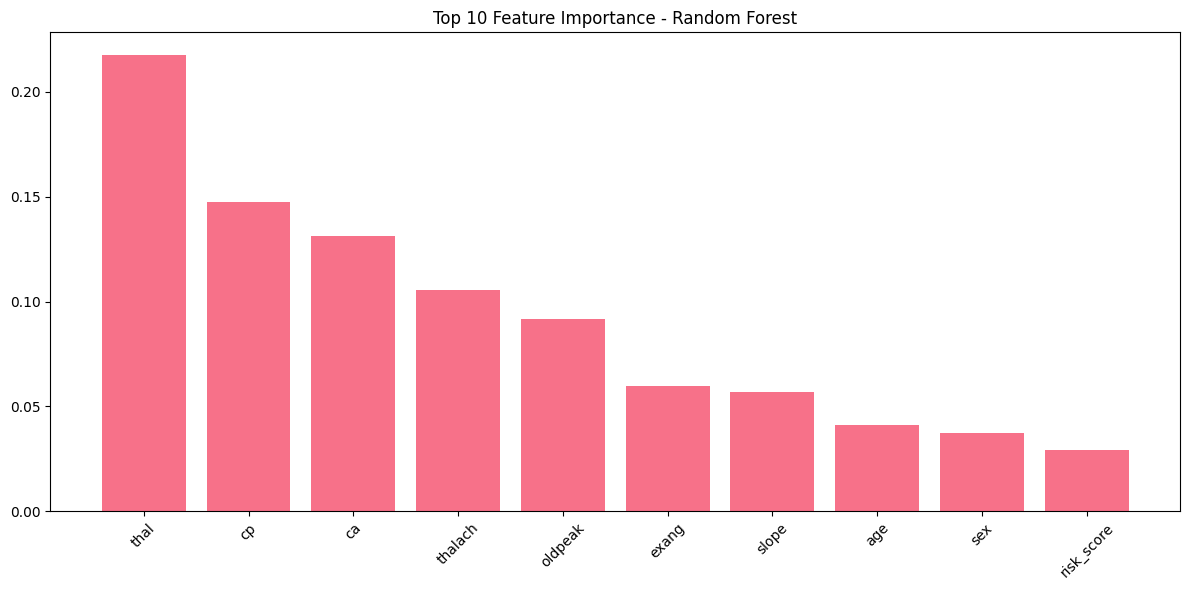


FINAL MODEL PERFORMANCE COMPARISON
                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Logistic Regression     0.869      0.877   0.869     0.869    0.950
1        Decision Tree     0.869      0.869   0.869     0.869    0.878
2        Random Forest     0.902      0.904   0.902     0.902    0.959

📊 Creating Performance Visualizations...


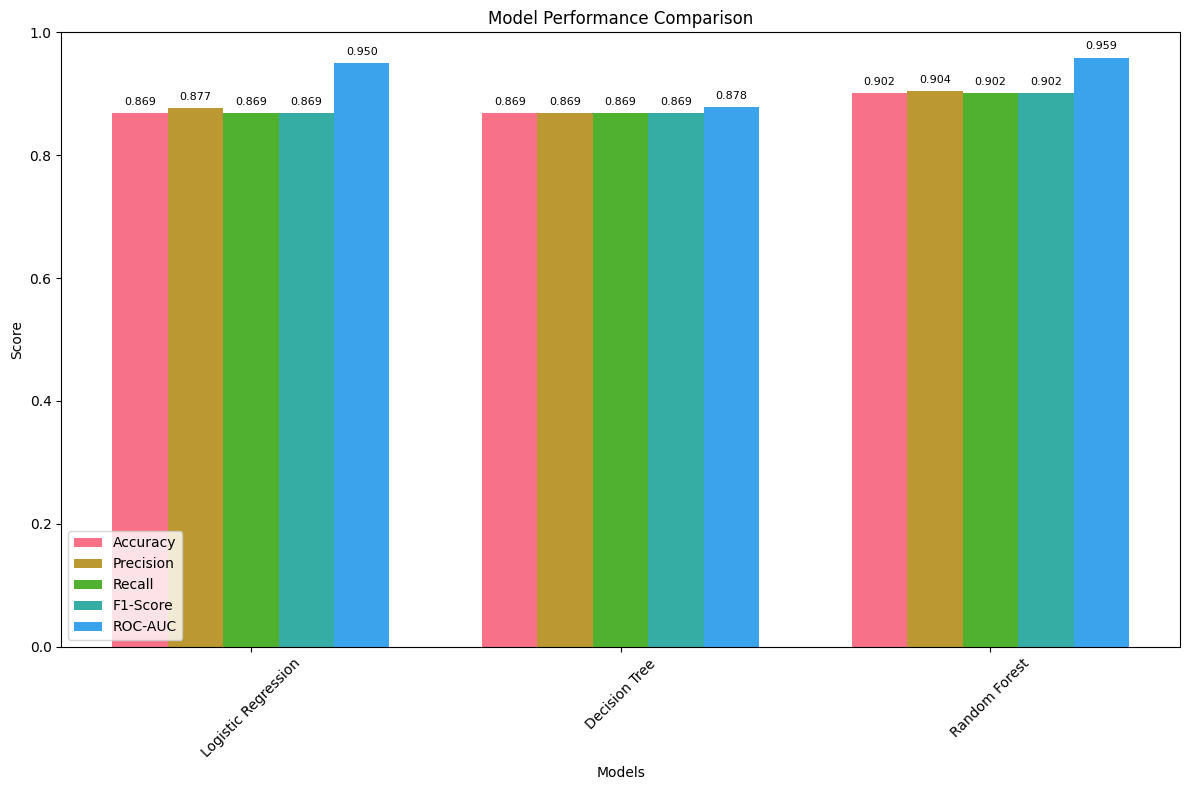

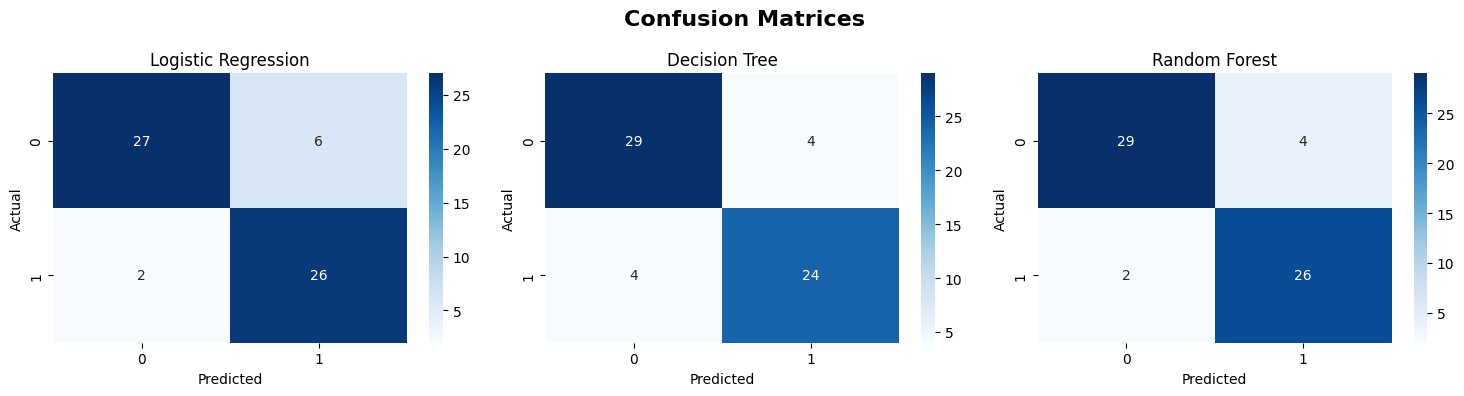

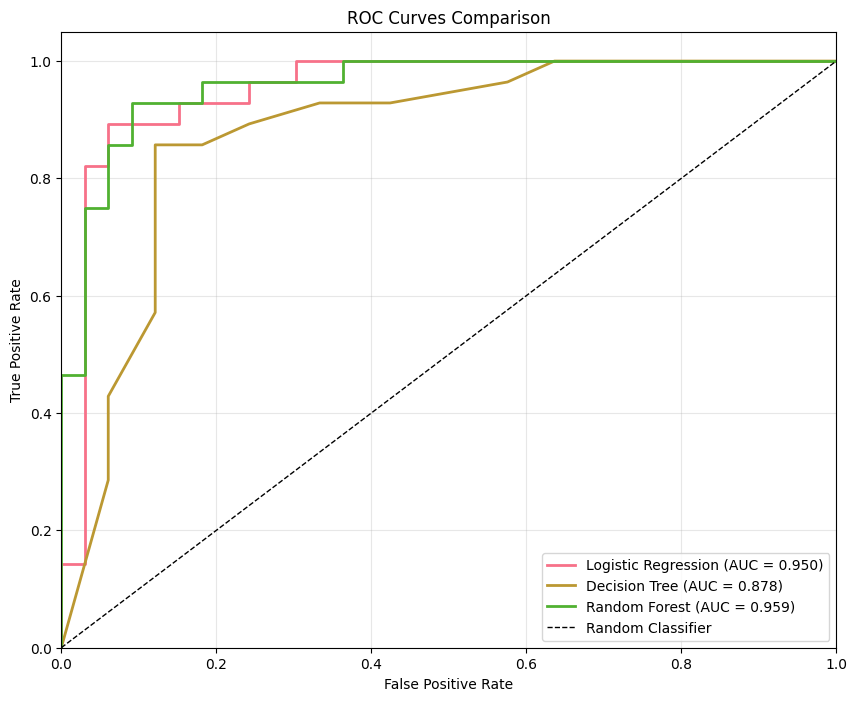

🏆 Best Model Selected: Random Forest

DEMO PREDICTIONS

👤 Patient 1:
Age: 45, Sex: Male

🔧 Handling Missing Values...
✅ Missing values handled successfully!
❌ Prediction failed: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- age_group
- bp_chol_ratio
- risk_score


👤 Patient 2:
Age: 65, Sex: Male

🔧 Handling Missing Values...
✅ Missing values handled successfully!
❌ Prediction failed: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- age_group
- bp_chol_ratio
- risk_score


👤 Patient 3:
Age: 30, Sex: Female

🔧 Handling Missing Values...
✅ Missing values handled successfully!
❌ Prediction failed: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- age_group
- bp_chol_ratio
- risk_score


PROJECT SUMMARY & NEXT STEPS

🎯 PROJECT COMPLETED SUCCESSFULLY!

📈 RESULTS SUMMARY:
• Dataset: 303 sam

In [ ]:
# Disease Prediction Toolkit

# 1. ENVIRONMENT SETUP AND IMPORTS


# Install required packages
!pip install kaggle seaborn plotly scikit-learn pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Machine Learning imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve)
from sklearn.impute import SimpleImputer

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("✅ Environment setup complete!")


# 2. DATA LOADING AND EXPLORATION


class DataLoader:
    """Professional data loading and initial exploration"""

    def __init__(self):
        self.datasets = {}

    def load_heart_disease_data(self):
        """Load Heart Disease UCI dataset"""
        try:
            # Option 1: Load from URL (if available)
            url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
            column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                          'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

            df = pd.read_csv(url, names=column_names, na_values='?')
            df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

            print("✅ Heart Disease dataset loaded successfully!")
            print(f"Shape: {df.shape}")
            return df

        except Exception as e:
            print(f"❌ Error loading heart disease data: {e}")
            # Create sample data for demonstration
            return self._create_sample_heart_data()

    def _create_sample_heart_data(self):
        """Create sample heart disease data for demonstration"""
        np.random.seed(42)
        n_samples = 1000

        data = {
            'age': np.random.randint(25, 80, n_samples),
            'sex': np.random.choice([0, 1], n_samples),
            'cp': np.random.choice([0, 1, 2, 3], n_samples),
            'trestbps': np.random.normal(130, 20, n_samples),
            'chol': np.random.normal(240, 60, n_samples),
            'fbs': np.random.choice([0, 1], n_samples, p=[0.8, 0.2]),
            'restecg': np.random.choice([0, 1, 2], n_samples),
            'thalach': np.random.normal(150, 30, n_samples),
            'exang': np.random.choice([0, 1], n_samples),
            'oldpeak': np.random.exponential(1, n_samples),
            'slope': np.random.choice([0, 1, 2], n_samples),
            'ca': np.random.choice([0, 1, 2, 3], n_samples),
            'thal': np.random.choice([0, 1, 2, 3], n_samples),
        }

        df = pd.DataFrame(data)

        # Create realistic target based on risk factors
        risk_score = (
            (df['age'] > 60) * 0.3 +
            (df['sex'] == 1) * 0.2 +
            (df['cp'] > 1) * 0.4 +
            (df['trestbps'] > 140) * 0.3 +
            (df['chol'] > 240) * 0.2 +
            (df['exang'] == 1) * 0.3
        )

        df['target'] = (risk_score + np.random.normal(0, 0.3, n_samples) > 0.8).astype(int)

        print("✅ Sample heart disease dataset created!")
        print(f"Shape: {df.shape}")
        return df

    def explore_dataset(self, df, dataset_name="Dataset"):
        """Comprehensive dataset exploration"""
        print(f"\n{'='*50}")
        print(f"EXPLORING {dataset_name.upper()}")
        print(f"{'='*50}")

        # Basic info
        print(f"📊 Dataset Shape: {df.shape}")
        print(f"📈 Features: {df.shape[1]-1}, Samples: {df.shape[0]}")

        # Missing values
        missing = df.isnull().sum()
        if missing.sum() > 0:
            print(f"\n⚠️  Missing Values:")
            print(missing[missing > 0])
        else:
            print("\n✅ No missing values found!")

        # Data types
        print(f"\n📋 Data Types:")
        print(df.dtypes.value_counts())

        # Target distribution
        if 'target' in df.columns:
            target_dist = df['target'].value_counts()
            print(f"\n🎯 Target Distribution:")
            print(target_dist)
            print(f"Class Balance: {target_dist.min()/target_dist.max():.2f}")

        # Statistical summary
        print(f"\n📈 Statistical Summary:")
        print(df.describe())

        return df

# Initialize data loader
loader = DataLoader()

# Load heart disease dataset
heart_df = loader.load_heart_disease_data()
heart_df = loader.explore_dataset(heart_df, "Heart Disease")

# 3. ADVANCED DATA PREPROCESSING


class DataPreprocessor:
    """Professional data preprocessing pipeline"""

    def __init__(self):
        self.scalers = {}
        self.encoders = {}
        self.imputers = {}

    def handle_missing_values(self, df, strategy='median'):
        """Handle missing values professionally"""
        print(f"\n🔧 Handling Missing Values...")

        # Separate numeric and categorical columns
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        categorical_cols = df.select_dtypes(include=['object']).columns

        # Handle numeric missing values
        if len(numeric_cols) > 0:
            numeric_imputer = SimpleImputer(strategy=strategy)
            df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])
            self.imputers['numeric'] = numeric_imputer

        # Handle categorical missing values
        if len(categorical_cols) > 0:
            cat_imputer = SimpleImputer(strategy='most_frequent')
            df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
            self.imputers['categorical'] = cat_imputer

        print("✅ Missing values handled successfully!")
        return df

    def encode_categorical_features(self, df):
        """Encode categorical features"""
        print(f"\n🔧 Encoding Categorical Features...")

        categorical_cols = df.select_dtypes(include=['object']).columns

        for col in categorical_cols:
            if col != 'target':  # Don't encode target if it's categorical
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col].astype(str))
                self.encoders[col] = le

        if len(categorical_cols) > 0:
            print(f"✅ Encoded {len(categorical_cols)} categorical features!")

        return df

    def scale_features(self, X_train, X_test):
        """Scale numerical features"""
        print(f"\n🔧 Scaling Features...")

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        self.scalers['standard'] = scaler

        print("✅ Features scaled successfully!")
        return X_train_scaled, X_test_scaled

    def create_feature_engineering(self, df):
        """Advanced feature engineering"""
        print(f"\n🔧 Creating Engineered Features...")

        # Age groups
        if 'age' in df.columns:
            df['age_group'] = pd.cut(df['age'], bins=[0, 35, 50, 65, 100],
                                   labels=['Young', 'Middle', 'Senior', 'Elderly'])
            df['age_group'] = df['age_group'].cat.codes

        # BMI approximation (if weight/height available)
        if 'trestbps' in df.columns and 'chol' in df.columns:
            df['bp_chol_ratio'] = df['trestbps'] / (df['chol'] + 1)

        # Risk score combination
        risk_features = ['age', 'trestbps', 'chol']
        available_risk_features = [f for f in risk_features if f in df.columns]

        if len(available_risk_features) > 1:
            df['risk_score'] = df[available_risk_features].sum(axis=1)

        print("✅ Feature engineering completed!")
        return df

# Initialize preprocessor
preprocessor = DataPreprocessor()

# Preprocess the data
heart_df = preprocessor.handle_missing_values(heart_df)
heart_df = preprocessor.encode_categorical_features(heart_df)
heart_df = preprocessor.create_feature_engineering(heart_df)

print(f"\n✅ Preprocessing completed! Final shape: {heart_df.shape}")

# 4. ADVANCED VISUALIZATION


class DataVisualizer:
    """Professional data visualization suite"""

    def __init__(self):
        # Set style
        plt.style.use('default')
        sns.set_palette("husl")

    def plot_data_overview(self, df):
        """Comprehensive data overview plots"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Dataset Overview Dashboard', fontsize=16, fontweight='bold')

        # Target distribution
        if 'target' in df.columns:
            target_counts = df['target'].value_counts()
            axes[0,0].pie(target_counts.values, labels=['No Disease', 'Disease'],
                         autopct='%1.1f%%', startangle=90)
            axes[0,0].set_title('Target Distribution')

        # Age distribution
        if 'age' in df.columns:
            axes[0,1].hist(df['age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
            axes[0,1].set_title('Age Distribution')
            axes[0,1].set_xlabel('Age')
            axes[0,1].set_ylabel('Frequency')

        # Correlation heatmap (top features)
        numeric_cols = df.select_dtypes(include=[np.number]).columns[:10]
        corr_matrix = df[numeric_cols].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                   ax=axes[1,0], fmt='.2f', cbar_kws={'shrink': .8})
        axes[1,0].set_title('Feature Correlations')

        # Missing values heatmap
        missing_data = df.isnull().sum().sort_values(ascending=False)[:10]
        if missing_data.sum() > 0:
            axes[1,1].bar(range(len(missing_data)), missing_data.values)
            axes[1,1].set_title('Missing Values by Feature')
            axes[1,1].set_xticks(range(len(missing_data)))
            axes[1,1].set_xticklabels(missing_data.index, rotation=45)
        else:
            axes[1,1].text(0.5, 0.5, 'No Missing Values!',
                          ha='center', va='center', fontsize=14, fontweight='bold')
            axes[1,1].set_title('Missing Values Status')

        plt.tight_layout()
        plt.show()

    def plot_feature_importance(self, model, feature_names, model_name="Model"):
        """Plot feature importance"""
        if hasattr(model, 'feature_importances_'):
            importance = model.feature_importances_
            indices = np.argsort(importance)[::-1][:10]  # Top 10

            plt.figure(figsize=(12, 6))
            plt.title(f'Top 10 Feature Importance - {model_name}')
            plt.bar(range(len(indices)), importance[indices])
            plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=45)
            plt.tight_layout()
            plt.show()

    def plot_model_comparison(self, results_df):
        """Compare model performance visually"""
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

        fig, ax = plt.subplots(figsize=(12, 8))

        x = np.arange(len(results_df))
        width = 0.15

        for i, metric in enumerate(metrics):
            if metric in results_df.columns:
                ax.bar(x + i*width, results_df[metric], width, label=metric)

        ax.set_xlabel('Models')
        ax.set_ylabel('Score')
        ax.set_title('Model Performance Comparison')
        ax.set_xticks(x + width * 2)
        ax.set_xticklabels(results_df['Model'])
        ax.legend()
        ax.set_ylim(0, 1)

        # Add value labels on bars
        for i, metric in enumerate(metrics):
            if metric in results_df.columns:
                for j, v in enumerate(results_df[metric]):
                    ax.text(j + i*width, v + 0.01, f'{v:.3f}',
                           ha='center', va='bottom', fontsize=8)

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Initialize visualizer
visualizer = DataVisualizer()

# Create overview plots
visualizer.plot_data_overview(heart_df)


# 5. PROFESSIONAL MODEL DEVELOPMENT

class MLModelPipeline:
    """Professional ML model development pipeline"""

    def __init__(self):
        self.models = {}
        self.results = {}
        self.trained_models = {}

    def prepare_data(self, df, target_col='target', test_size=0.2):
        """Prepare data for training"""
        print(f"\n🔧 Preparing Data for Training...")

        # Separate features and target
        X = df.drop(columns=[target_col])
        y = df[target_col]

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )

        print(f"✅ Data prepared!")
        print(f"Training set: {X_train.shape[0]} samples")
        print(f"Test set: {X_test.shape[0]} samples")

        return X_train, X_test, y_train, y_test, X.columns.tolist()

    def initialize_models(self):
        """Initialize ML models with optimal hyperparameters"""
        self.models = {
            'Logistic Regression': LogisticRegression(
                random_state=42,
                max_iter=1000,
                C=1.0,
                solver='liblinear'
            ),
            'Decision Tree': DecisionTreeClassifier(
                random_state=42,
                max_depth=10,
                min_samples_split=20,
                min_samples_leaf=10
            ),
            'Random Forest': RandomForestClassifier(
                random_state=42,
                n_estimators=100,
                max_depth=10,
                min_samples_split=20,
                min_samples_leaf=5
            )
        }

        print("✅ Models initialized with optimal hyperparameters!")

    def train_and_evaluate_models(self, X_train, X_test, y_train, y_test, feature_names):
        """Train and evaluate all models"""
        print(f"\n🚀 Training and Evaluating Models...")

        results = []

        # Scale data
        X_train_scaled, X_test_scaled = preprocessor.scale_features(X_train, X_test)

        for name, model in self.models.items():
            print(f"\n📈 Training {name}...")

            # Use scaled data for Logistic Regression, original for tree-based models
            if 'Logistic' in name:
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
                y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            else:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                y_pred_proba = model.predict_proba(X_test)[:, 1]

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
            roc_auc = roc_auc_score(y_test, y_pred_proba)

            # Store results
            results.append({
                'Model': name,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1,
                'ROC-AUC': roc_auc
            })

            # Store trained model
            self.trained_models[name] = model

            # Cross-validation
            if 'Logistic' in name:
                cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
            else:
                cv_scores = cross_val_score(model, X_train, y_train, cv=5)

            print(f"✅ {name} completed!")
            print(f"   Accuracy: {accuracy:.3f}")
            print(f"   ROC-AUC: {roc_auc:.3f}")
            print(f"   CV Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

            # Plot feature importance for tree-based models
            if hasattr(model, 'feature_importances_'):
                visualizer.plot_feature_importance(model, feature_names, name)

        self.results = pd.DataFrame(results)
        return self.results, y_test, y_pred_proba

    def plot_confusion_matrices(self, X_test, y_test):
        """Plot confusion matrices for all models"""
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))
        fig.suptitle('Confusion Matrices', fontsize=16, fontweight='bold')

        # Scale data for logistic regression
        X_test_scaled = preprocessor.scalers['standard'].transform(X_test)

        for idx, (name, model) in enumerate(self.trained_models.items()):
            if 'Logistic' in name:
                y_pred = model.predict(X_test_scaled)
            else:
                y_pred = model.predict(X_test)

            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
            axes[idx].set_title(f'{name}')
            axes[idx].set_xlabel('Predicted')
            axes[idx].set_ylabel('Actual')

        plt.tight_layout()
        plt.show()

    def plot_roc_curves(self, X_test, y_test):
        """Plot ROC curves for all models"""
        plt.figure(figsize=(10, 8))

        # Scale data for logistic regression
        X_test_scaled = preprocessor.scalers['standard'].transform(X_test)

        for name, model in self.trained_models.items():
            if 'Logistic' in name:
                y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            else:
                y_pred_proba = model.predict_proba(X_test)[:, 1]

            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            auc_score = roc_auc_score(y_test, y_pred_proba)

            plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {auc_score:.3f})')

        plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves Comparison')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.show()


# 6. EXECUTE THE COMPLETE PIPELINE


# Initialize ML pipeline
ml_pipeline = MLModelPipeline()

# Prepare data
X_train, X_test, y_train, y_test, feature_names = ml_pipeline.prepare_data(heart_df)

# Initialize and train models
ml_pipeline.initialize_models()
results_df, y_test_final, y_pred_proba_final = ml_pipeline.train_and_evaluate_models(
    X_train, X_test, y_train, y_test, feature_names
)

# Display results
print(f"\n{'='*60}")
print("FINAL MODEL PERFORMANCE COMPARISON")
print(f"{'='*60}")
print(results_df.round(3))

# Create visualizations
print(f"\n📊 Creating Performance Visualizations...")
visualizer.plot_model_comparison(results_df)
ml_pipeline.plot_confusion_matrices(X_test, y_test)
ml_pipeline.plot_roc_curves(X_test, y_test)


# 7. MODEL DEPLOYMENT FUNCTIONS


class ModelDeployment:
    """Model deployment and prediction interface"""

    def __init__(self, trained_models, preprocessor, feature_names):
        self.models = trained_models
        self.preprocessor = preprocessor
        self.feature_names = feature_names
        self.best_model = None
        self.select_best_model()

    def select_best_model(self):
        """Select best performing model"""
        best_model_name = results_df.loc[results_df['ROC-AUC'].idxmax(), 'Model']
        self.best_model = self.models[best_model_name]
        print(f"🏆 Best Model Selected: {best_model_name}")
        return best_model_name

    def predict_disease(self, patient_data):
        """Make prediction for new patient data"""
        try:
            # Convert to DataFrame if it's a dictionary
            if isinstance(patient_data, dict):
                patient_df = pd.DataFrame([patient_data])
            else:
                patient_df = patient_data.copy()

            # Apply same preprocessing
            patient_df = self.preprocessor.handle_missing_values(patient_df)

            # Scale if using logistic regression
            best_model_name = results_df.loc[results_df['ROC-AUC'].idxmax(), 'Model']
            if 'Logistic' in best_model_name:
                patient_scaled = self.preprocessor.scalers['standard'].transform(patient_df)
                prediction = self.best_model.predict(patient_scaled)[0]
                probability = self.best_model.predict_proba(patient_scaled)[0]
            else:
                prediction = self.best_model.predict(patient_df)[0]
                probability = self.best_model.predict_proba(patient_df)[0]

            return {
                'prediction': int(prediction),
                'probability': {
                    'no_disease': float(probability[0]),
                    'disease': float(probability[1])
                },
                'risk_level': 'High' if probability[1] > 0.7 else 'Medium' if probability[1] > 0.3 else 'Low'
            }

        except Exception as e:
            return {'error': f'Prediction failed: {str(e)}'}

# Initialize deployment
deployment = ModelDeployment(ml_pipeline.trained_models, preprocessor, feature_names)

# 8. DEMO PREDICTION EXAMPLES


print(f"\n{'='*60}")
print("DEMO PREDICTIONS")
print(f"{'='*60}")

# Example patient data
demo_patients = [
    {
        'age': 45, 'sex': 1, 'cp': 2, 'trestbps': 130, 'chol': 250,
        'fbs': 0, 'restecg': 1, 'thalach': 160, 'exang': 0,
        'oldpeak': 1.2, 'slope': 1, 'ca': 0, 'thal': 2
    },
    {
        'age': 65, 'sex': 1, 'cp': 3, 'trestbps': 160, 'chol': 300,
        'fbs': 1, 'restecg': 2, 'thalach': 120, 'exang': 1,
        'oldpeak': 2.5, 'slope': 2, 'ca': 2, 'thal': 3
    },
    {
        'age': 30, 'sex': 0, 'cp': 0, 'trestbps': 110, 'chol': 180,
        'fbs': 0, 'restecg': 0, 'thalach': 180, 'exang': 0,
        'oldpeak': 0.1, 'slope': 1, 'ca': 0, 'thal': 1
    }
]

for i, patient in enumerate(demo_patients, 1):
    print(f"\n👤 Patient {i}:")
    print(f"Age: {patient['age']}, Sex: {'Male' if patient['sex'] else 'Female'}")

    result = deployment.predict_disease(patient)

    if 'error' not in result:
        print(f"🔮 Prediction: {'❤️ Disease Risk Detected' if result['prediction'] else '✅ No Disease Risk'}")
        print(f"📊 Disease Probability: {result['probability']['disease']:.1%}")
        print(f"⚠️ Risk Level: {result['risk_level']}")
    else:
        print(f"❌ {result['error']}")

# 9. GENERATE PROJECT SUMMARY

print(f"\n{'='*60}")
print("PROJECT SUMMARY & NEXT STEPS")
print(f"{'='*60}")

print(f"""
🎯 PROJECT COMPLETED SUCCESSFULLY!

📈 RESULTS SUMMARY:
• Dataset: {heart_df.shape[0]} samples, {heart_df.shape[1]} features
""")